# LR cancer(逻辑回归)

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np

# 加载数据
data = pd.read_csv(r'F:\Maker\系统学习\4_机器学习及实战\3_逻辑回归\breast-cancer-wisconsin.csv')
print(data.info())
print(data)

# 数据处理
##  缺失值
data = data.replace(to_replace = '?', value = np.NAN)
data = data.dropna()

## 获取特征或目标值
X = data.iloc[:, 1:-1]
y = data['Class']

## 数据划分
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

# 特征工程（标准化）
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

# 模型训练
model = LogisticRegression()
model.fit(x_train, y_train)

# 模型预测与评估
y_pre = model.predict(x_test)
print(y_pre)
print(accuracy_score(y_test, y_pre))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
     Sample code number  Clump Thickness  Uniformity of Cell Size  \
0               1000025     

# classmetric

In [22]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# 构建数据：真实值，预测值
y_true = ['恶性','恶性','恶性','恶性','恶性','恶性','良性','良性','良性','良性']
y_pre_A = ['恶性','恶性','恶性','良性','良性','良性','良性','良性','良性','良性']
y_pre_B = ['恶性','恶性','恶性','恶性','恶性','恶性','恶性','恶性','恶性','良性']

# 混淆矩阵
A = confusion_matrix(y_true, y_pre_A, labels = ['恶性','良性'])
print(pd.DataFrame(A, columns= ['恶性','良性'], index = ['恶性','良性']))

B = confusion_matrix(y_true, y_pre_B, labels = ['恶性','良性'])
print(pd.DataFrame(B, columns = ['恶性','良性'], index = ['恶性','良性']))

# 精确率
print(precision_score(y_true, y_pre_A, pos_label = '恶性'))
print(precision_score(y_true, y_pre_B,pos_label = '恶性'))

# 召回率
print(recall_score(y_true, y_pre_A, pos_label='恶性'))
print(recall_score(y_true, y_pre_B, pos_label='恶性'))

# f1分数
print(f1_score(y_true, y_pre_A, pos_label='恶性'))
print(f1_score(y_true, y_pre_B, pos_label='恶性'))

    恶性  良性
恶性   3   3
良性   0   4
    恶性  良性
恶性   6   0
良性   3   1
1.0
0.6666666666666666
0.5
1.0
0.6666666666666666
0.8


# 模型案例——chum

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# 数据处理
data = pd.read_csv(r'F:\Maker\系统学习\4_机器学习及实战\3_逻辑回归\churn.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              7043 non-null   object 
 1   gender             7043 non-null   object 
 2   Partner_att        7043 non-null   int64  
 3   Dependents_att     7043 non-null   int64  
 4   landline           7043 non-null   int64  
 5   internet_att       7043 non-null   int64  
 6   internet_other     7043 non-null   int64  
 7   StreamingTV        7043 non-null   int64  
 8   StreamingMovies    7043 non-null   int64  
 9   Contract_Month     7043 non-null   int64  
 10  Contract_1YR       7043 non-null   int64  
 11  PaymentBank        7043 non-null   int64  
 12  PaymentCreditcard  7043 non-null   int64  
 13  PaymentElectronic  7043 non-null   int64  
 14  MonthlyCharges     7043 non-null   float64
 15  TotalCharges       7043 non-null   float64
dtypes: float64(2), int64(12)

In [27]:
data = pd.get_dummies(data)
print(data.head())

   Partner_att  Dependents_att  landline  internet_att  internet_other  \
0            1               0         0             1               0   
1            0               0         1             1               0   
2            0               0         1             1               0   
3            0               0         0             1               0   
4            0               0         1             0               1   

   StreamingTV  StreamingMovies  Contract_Month  Contract_1YR  PaymentBank  \
0            0                0               1             0            0   
1            0                0               0             1            0   
2            0                0               1             0            0   
3            0                0               0             1            1   
4            0                0               1             0            0   

   PaymentCreditcard  PaymentElectronic  MonthlyCharges  TotalCharges  \
0            

In [28]:
data = data.drop(['Churn_No', 'gender_Male'], axis = 1)
print(data.head())

data = data.rename(columns={'Churn_Yes':'flag'})
print(data.head())
print(data.flag.value_counts())

   Partner_att  Dependents_att  landline  internet_att  internet_other  \
0            1               0         0             1               0   
1            0               0         1             1               0   
2            0               0         1             1               0   
3            0               0         0             1               0   
4            0               0         1             0               1   

   StreamingTV  StreamingMovies  Contract_Month  Contract_1YR  PaymentBank  \
0            0                0               1             0            0   
1            0                0               0             1            0   
2            0                0               1             0            0   
3            0                0               0             1            1   
4            0                0               1             0            0   

   PaymentCreditcard  PaymentElectronic  MonthlyCharges  TotalCharges  \
0            

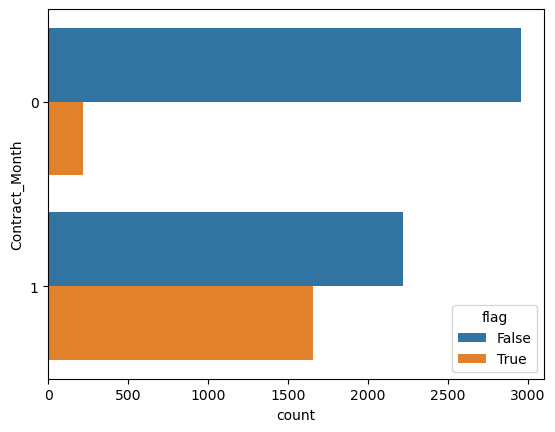

In [29]:
# 特征工程
sns.countplot(data = data, y = 'Contract_Month', hue = 'flag')
plt.show()

In [31]:
x = data[['PaymentElectronic','Contract_Month','internet_other']]
y = data['flag']

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=22)

# 模型训练
LR = LogisticRegression()
LR.fit(x_train, y_train)

# 模型评估
y_pre = LR.predict(x_test)
print(accuracy_score(y_test, y_pre))
print('-'*50)
print(roc_auc_score(y_test, y_pre))
print('-'*50)
print(classification_report(y_test, y_pre))

0.7877927608232789
--------------------------------------------------
0.6779637810328347
--------------------------------------------------
              precision    recall  f1-score   support

       False       0.82      0.91      0.86      1035
        True       0.65      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.69      1409
weighted avg       0.77      0.79      0.77      1409

